Membaca Data

In [1996]:
import pandas as pd
var = ['id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 
       'Duration', 'Purpose', 'Risk']

df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


Melihat Informasi Attribut

In [1997]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Menghitung Data null

In [1998]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Melihat statistik pada dataframe

In [1999]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


Melihat banyaknya data kelas

In [2000]:
df.groupby("Risk").count()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
Risk,,,,,,,,,,
bad,300,300,300,300,300,268,254,300,300,300
good,700,700,700,700,700,549,352,700,700,700


Melihat data kelas berdasarkan Kelamin

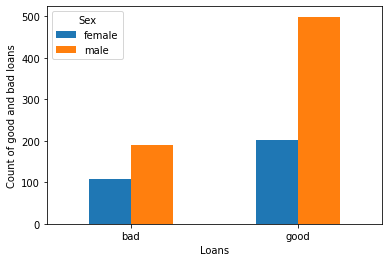

In [2001]:
import matplotlib.pyplot as plt

pd.crosstab(df["Risk"], df["Sex"]).plot.bar(rot=0)
plt.xlabel("Loans")
plt.ylabel("Count of good and bad loans")
plt.show()

Membuang Kolom yang tidak diperlukan

In [2002]:
# Dibuang karena hanya berupa ID data dan tidak berpengaruh pada proses klasifikasi
df.drop(columns="Unnamed: 0", inplace=True)

In [2003]:
# Dibuang karena jumlah null melebihi 30% dan jika di imputasi dapat menurunkan hasil klasifikasi
df.drop(columns="Checking account", inplace=True)

Mengisi data null

In [2004]:
# mengisi data kosong dengan data yang sering muncul yaitu "little"
df["Saving accounts"] = df["Saving accounts"].fillna(df["Saving accounts"].mode()[0])

Melihat data Hasil Preprocessing

In [2005]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,1169,6,radio/TV,good
1,22,female,2,own,little,5951,48,radio/TV,bad
2,49,male,1,own,little,2096,12,education,good
3,45,male,2,free,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,4870,24,car,bad


In [2006]:
df.groupby("Risk").count()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
Risk,,,,,,,,
bad,300,300,300,300,300,300,300,300
good,700,700,700,700,700,700,700,700


In [2007]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


Normalisasi Data

In [2008]:
from sklearn.preprocessing import LabelEncoder

new_df = df #Membuat dataframe baru agar tidak mengganggu data asli, jika diperlukan
le = LabelEncoder()
categorical = ["Sex","Housing","Saving accounts","Purpose","Risk"]

for cat in categorical:
    lblCat = le.fit_transform(df[cat])
    new_df[cat] = lblCat
    
new_df.head()


,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,1169,6,5,1
1,22,0,2,1,0,5951,48,5,0
2,49,1,1,1,0,2096,12,3,1
3,45,1,2,0,0,7882,42,4,1
4,53,1,2,0,0,4870,24,1,0


In [2009]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              1000 non-null   int64
 1   Sex              1000 non-null   int32
 2   Job              1000 non-null   int64
 3   Housing          1000 non-null   int32
 4   Saving accounts  1000 non-null   int32
 5   Credit amount    1000 non-null   int64
 6   Duration         1000 non-null   int64
 7   Purpose          1000 non-null   int32
 8   Risk             1000 non-null   int32
dtypes: int32(5), int64(4)
memory usage: 50.9 KB


Membuat data kelas menjadi balance menggunakan SMOTE

In [2010]:
x = new_df[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount',
        'Duration', 'Purpose']]
y = new_df['Risk']

from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE(random_state=42).fit_resample(x,y)

Melihat Hasil balancing

In [2011]:
import numpy as np
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_resampled == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_resampled == 1))

Banyak data kelas 0 (bad) :  700
Banyak data kelas 1 (good):  700


Melihat data kelas berdasarkan Kelamin

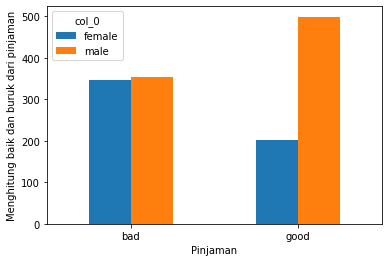

In [2012]:
enc = LabelEncoder()
enc.fit(["female","male"])

pd.crosstab(le.inverse_transform(y_resampled), 
            enc.inverse_transform(x_resampled["Sex"])).plot.bar(rot=0)
plt.xlabel("Pinjaman")
plt.ylabel("Menghitung baik dan buruk dari pinjaman")
plt.show()


Spliting data menggunakan stratified random sampling

In [2013]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, 
                                                    random_state=42, stratify=y_resampled)

print("Data Train")
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_train == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_train == 1))

print("\nData Test")
print("Banyak data kelas 0 (bad) : ",np.count_nonzero(y_test == 0))
print("Banyak data kelas 1 (good): ",np.count_nonzero(y_test == 1))

Data Train
Banyak data kelas 0 (bad) :  560
Banyak data kelas 1 (good):  560

Data Test
Banyak data kelas 0 (bad) :  140
Banyak data kelas 1 (good):  140


# Proses Klasifikasi

## KNN

In [2014]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, validation_curve

#Membuat model klasifikasi
modelKNN = KNeighborsClassifier(n_neighbors=5)

#Melatih model menggunakan training dataset 
modelKNN.fit(X_train, y_train)


KNeighborsClassifier()

Check model overfitting/underfitting/optimal

In [2015]:
accuracyScoreTrain = cross_val_score(modelKNN, X_train, y_train, cv=5)
accuracyScoreTest = cross_val_score(modelKNN, X_test, y_test, cv=5)

print("Accuracy cross-validation Train : \n",accuracyScoreTrain, "Mean : ", np.mean(accuracyScoreTrain))
print("\nAccuracy cross-validation Test : \n",accuracyScoreTest, "Mean : ", np.mean(accuracyScoreTest))

Accuracy cross-validation Train : 
 [0.65178571 0.63392857 0.61607143 0.6875     0.64732143] Mean :  0.6473214285714286

Accuracy cross-validation Test : 
 [0.58928571 0.625      0.64285714 0.57142857 0.48214286] Mean :  0.5821428571428572


Proses prediksi Klasifikasi 

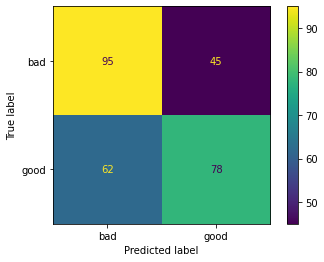


 Classification report : 
               precision    recall  f1-score   support

           0       0.61      0.68      0.64       140
           1       0.63      0.56      0.59       140

    accuracy                           0.62       280
   macro avg       0.62      0.62      0.62       280
weighted avg       0.62      0.62      0.62       280



In [2016]:
#Memprediksi hasil dari test dataset
predictions  = modelKNN.predict(X_test)

#Menampilkan Hasil
cm = confusion_matrix(y_test, predictions, labels=modelKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(modelKNN.classes_))
disp.plot()
plt.show()

print("\n Classification report : \n",classification_report(y_test, predictions))

## Random Forest

In [2017]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Membuat model klasifikasi
modelRFC = RandomForestClassifier(random_state=42)

#Melatih model menggunakan training dataset 
modelRFC.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Check model overfitting/underfitting/optimal

In [2018]:
accuracyScoreTrain = cross_val_score(modelRFC, X_train, y_train, cv=6)
accuracyScoreTest = cross_val_score(modelRFC, X_test, y_test, cv=6)

print("Accuracy cross-validation Train : \n",accuracyScoreTrain, "Mean : ", np.mean(accuracyScoreTrain))
print("\nAccuracy cross-validation Test : \n",accuracyScoreTest, "Mean : ", np.mean(accuracyScoreTest))

Accuracy cross-validation Train : 
 [0.72727273 0.7486631  0.78074866 0.73796791 0.75806452 0.72580645] Mean :  0.7464205623598413

Accuracy cross-validation Test : 
 [0.63829787 0.65957447 0.57446809 0.76595745 0.73913043 0.67391304] Mean :  0.6752235584335491


Proses prediksi Klasifikasi 

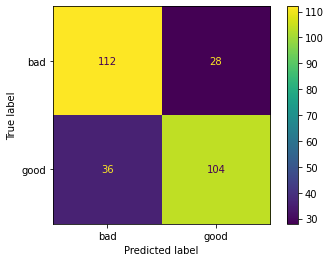


 Classification report : 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       140
           1       0.79      0.74      0.76       140

    accuracy                           0.77       280
   macro avg       0.77      0.77      0.77       280
weighted avg       0.77      0.77      0.77       280



In [2019]:
#Memprediksi hasil dari test dataset
predictionsRfc = modelRFC.predict(X_test)

#Menampilkan Hasil
cm = confusion_matrix(y_test, predictionsRfc, labels=modelRFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(modelRFC.classes_))
disp.plot()
plt.show()

print ("\n Classification report : \n",classification_report(y_test,predictionsRfc))

## Gaussian Naive Bayes

In [2020]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB

#Model Training#Membuat model klasifikasi
modelNB = GaussianNB()

#Melatih model menggunakan training dataset 
modelNB.fit(X_train, y_train);

Check model overfitting/underfitting/optimal

In [2021]:
accuracyScoreTrain = cross_val_score(modelNB, X_train, y_train, cv=5)
accuracyScoreTest = cross_val_score(modelNB , X_test, y_test, cv=5)

print("Accuracy cross-validation Train : \n",accuracyScoreTrain, "Mean : ", np.mean(accuracyScoreTrain))
print("\nAccuracy cross-validation Test : \n",accuracyScoreTest, "Mean : ", np.mean(accuracyScoreTest))

Accuracy cross-validation Train : 
 [0.66517857 0.66517857 0.70089286 0.64732143 0.66517857] Mean :  0.66875

Accuracy cross-validation Test : 
 [0.58928571 0.64285714 0.625      0.73214286 0.71428571] Mean :  0.6607142857142858


Proses prediksi Klasifikasi 

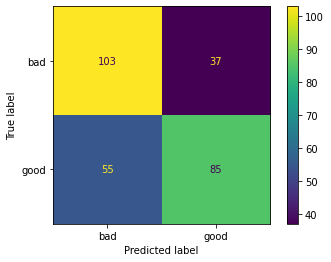


 Classification report : 
               precision    recall  f1-score   support

           0       0.65      0.74      0.69       140
           1       0.70      0.61      0.65       140

    accuracy                           0.67       280
   macro avg       0.67      0.67      0.67       280
weighted avg       0.67      0.67      0.67       280



In [2022]:
#Memprediksi hasil dari test dataset
predictionsNB = modelNB.predict(X_test)

#Menampilkan Hasil
cm = confusion_matrix(y_test, predictionsNB, labels=modelNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=le.inverse_transform(modelNB.classes_))
disp.plot()
plt.show()

print ("\n Classification report : \n",classification_report(y_test,predictionsNB))
